In [1]:

import cv2
image = cv2.imread("Divyansh.jpg")
  
# Now, the variable 'image' stores the pixel values of image
print(image)

[[[206 207 203]
  [209 210 206]
  [213 214 210]
  ...
  [153 169 168]
  [153 169 168]
  [151 167 166]]

 [[208 209 205]
  [211 212 208]
  [215 216 212]
  ...
  [151 167 166]
  [150 166 165]
  [148 164 163]]

 [[208 209 205]
  [210 211 207]
  [215 216 212]
  ...
  [151 167 166]
  [149 165 164]
  [147 163 162]]

 ...

 [[184 185 183]
  [176 177 175]
  [171 172 170]
  ...
  [198 196 156]
  [200 198 158]
  [202 200 160]]

 [[175 176 174]
  [170 171 169]
  [166 167 165]
  ...
  [197 195 155]
  [200 198 158]
  [202 200 160]]

 [[156 157 155]
  [152 153 151]
  [150 151 149]
  ...
  [197 195 155]
  [200 198 158]
  [202 200 160]]]


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

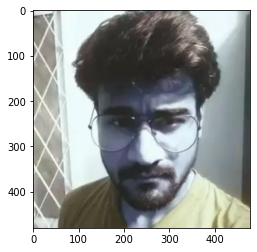

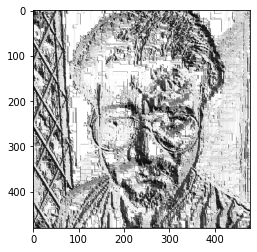

LBP Program is finished


In [4]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = 'Divyansh.jpg'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   
print("LBP Program is finished")